# Data Processing 

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)

## Exploratory Data Analysis (EDA)

In [2]:
url = 'https://raw.githubusercontent.com/t-davidson/hate-speech-and-offensive-language/master/data/labeled_data.csv'
data = pd.read_csv(url)

In [3]:
data.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [4]:
data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;


In [5]:
data.shape

(24783, 7)

### What is our class distribution? 

0 - hate speech <br/> 
1 - offensive language <br/> 
2 - neither (normal) <br/> 

In [6]:
import seaborn as sns

sns.set_palette('husl')
ax = sns.barplot(x='class', y='count', data=data.groupby('class').agg('count').reset_index())
_ = ax.set_title("Class Distribution")

In [7]:
data['class'].value_counts() / data.shape[0] * 100

1    77.432111
2    16.797805
0    5.770084 
Name: class, dtype: float64

In [8]:
(data[data['hate_speech']==data['count']].shape[0] / data.shape[0]) * 100

1.0612113142073194

In [9]:
data['count'].max()

9

In [10]:
data[(data['hate_speech']==data['count']) & (data['count'] == 6)]['tweet']

3404     @Hovaa_ ya I know all the slang I'm racist I h8 porch monkies                           
19136    RT @iBeZo: Stupid fucking nigger LeBron. You flopping stupid jungle bunny monkey faggot.
Name: tweet, dtype: object

In [11]:
# pip install wordcloud

In [12]:
from wordcloud import WordCloud

0
1
2


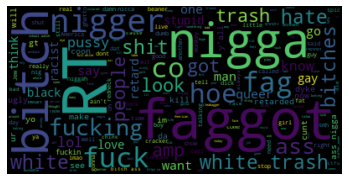

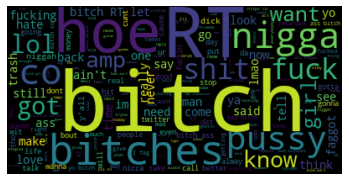

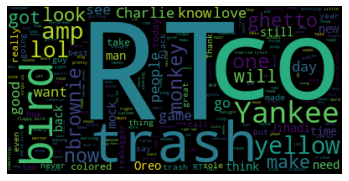

In [13]:
import matplotlib.pyplot as plt 
wordclouds = []
for _class in [0, 1, 2]:
    corpus = ' '.join(data[data['class'] == _class]['tweet'].to_list())
    w  = WordCloud().generate(corpus)
    print(_class)
    plt.figure()
    plt.imshow(w, interpolation='bilinear')
    plt.axis('off')

## Tweet Processing

1. Remove punctuation 
2. Change to all lowercase 
3. Remove reserved words / urls / mentions 

In [14]:
# pip install tweet-preprocessor 

In [15]:
import preprocessor as p 

In [16]:
import string 

p.set_options(p.OPT.URL, p.OPT.MENTION, p.OPT.RESERVED)

def cleaning(_tweet):
    tweet = p.clean(_tweet)
    tweet = tweet.lower()
    tweet = tweet.replace('rt', '')
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))  
    return tweet

data['tweet_processed'] = data['tweet'].apply(cleaning)
data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,tweet_processed
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...,as a woman you shouldnt complain about cleaning up your house amp as a man you should always take the trash out
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,boy dats coldtyga dwn bad for cuffin dat hoe in the 1st place
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit,dawg you ever fuck a bitch and she sta to cry you be confused as shit
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny,she look like a tranny
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;,the shit you hear about me might be true or it might be faker than the bitch who told it to ya 57361


### Trim/Pad Tweets

In [17]:
threshold = int(data['tweet'].apply(lambda x: len(x.split(' '))).mean())

def tokenize(_tweet, threshold=threshold):
    tweet = _tweet.strip().split(' ')
    if len(tweet) < threshold:
        tweet = tweet + [''] * (threshold - len(tweet))
    elif len(tweet) > threshold:
        tweet = tweet[:threshold]
    return tweet

data['tweet_tokenized'] = data['tweet_processed'].apply(tokenize, threshold=threshold)
data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,tweet_processed,tweet_tokenized
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...,as a woman you shouldnt complain about cleaning up your house amp as a man you should always take the trash out,"[as, a, woman, you, shouldnt, complain, about, cleaning, up, your, house, amp, as, a]"
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,boy dats coldtyga dwn bad for cuffin dat hoe in the 1st place,"[boy, dats, coldtyga, dwn, bad, for, cuffin, dat, hoe, in, the, 1st, place, ]"
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit,dawg you ever fuck a bitch and she sta to cry you be confused as shit,"[dawg, , , you, ever, fuck, a, bitch, and, she, sta, to, cry, you]"
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny,she look like a tranny,"[she, look, like, a, tranny, , , , , , , , , ]"
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;,the shit you hear about me might be true or it might be faker than the bitch who told it to ya 57361,"[the, shit, you, hear, about, me, might, be, true, or, it, might, be, faker]"


In [18]:
data['tweet_tokenized'].apply(lambda x: len(x)).mean()

14.0

## TF-IDF Embedding 
= TF(t, d) * IDF(t) <br/> 

IDF(t) = log((1 + n)/ (1 + df(d, t))

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = data['tweet_processed'].to_list()
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)


In [20]:
X.shape

(24783, 25353)

## Pretrained word2vec embedding - Tweets


In [21]:
# pip install gensim 

import os 
from gensim.models import word2vec, KeyedVectors

filename = os.path.join('data/word2vec_twitter_tokens.bin')
word_vectors = KeyedVectors.load_word2vec_format(filename, binary=True, unicode_errors='ignore')

In [22]:
def generate_random_embeddings(twitter_embed_dim):
    return np.random.normal(scale=.6, size=(twitter_embed_dim,))


In [23]:
word_vectors['the'].shape

(400,)

In [24]:
import numpy as np

def embedding(tweet_tokens, twitter_embed_dim=400):
    return np.array([np.array(generate_random_embeddings(twitter_embed_dim)) if w not in word_vectors else np.array(word_vectors[w])
    for w in tweet_tokens])

data['tweet_embedded'] = data['tweet_tokenized'].apply(embedding)
data.head()

Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0  0           3      0            0                   3        2       
1  1           3      0            3                   0        1       
2  2           3      0            3                   0        1       
3  3           3      0            2                   1        1       
4  4           6      0            6                   0        1       

                                                                                                                                          tweet  \
0  !!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...   
1  !!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!                                                          
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit                       
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny                                                                                 
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;      

                                                                                                      tweet_processed  \
0     as a woman you shouldnt complain about cleaning up your house amp as a man you should always take the trash out   
1     boy dats coldtyga dwn bad for cuffin dat hoe in the 1st place                                                     
2    dawg   you ever fuck a bitch and she sta to cry you be confused as shit                                            
3     she look like a tranny                                                                                            
4     the shit you hear about me might be true or it might be faker than the bitch who told it to ya 57361              

                                                                         tweet_tokenized  \
0  [as, a, woman, you, shouldnt, complain, about, cleaning, up, your, house, amp, as, a]   
1  [boy, dats, coldtyga, dwn, bad, for, cuffin, dat, hoe, in, the, 1st, place, ]           
2  [dawg, , , you, ever, fuck, a, bitch, and, she, sta, to, cry, you]                      
3  [she, look, like, a, tranny, , , , , , , , , ]                                          
4  [the, shit, you, hear, about, me, might, be, true, or, it, might, be, faker]            

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [25]:
data['tweet_embedded'][0].shape

(14, 400)

## Save Data 

In [26]:
data.to_pickle('data/data.pickle')


In [27]:
pd.DataFrame(X.toarray()).to_pickle('data/tfidf.pickle')